In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nutrition = pd.read_csv('drive/Shared drives/Fall2020DSGirlPower/SI671/project/data/nutrition.csv')
products = pd.read_csv('drive/Shared drives/Fall2020DSGirlPower/SI671/project/data/products.csv')

In [ ]:
nutrition.head(2)

,product_name,brands,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_uk,nutrition_grade_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,phosphorus_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,NaN,d,2243.0,NaN,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.0,0.0,0.0,0.0214,0.0,NaN,0.00129,14.0,14.0


In [ ]:
#delete nutrition data without a name
nu_data = nutrition[-nutrition.product_name.isnull()]

In [ ]:
#extract nutrition data with level of ingridients 
nu_level_data = nu_data[['product_name','brands','energy_100g', 'energy-from-fat_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'phosphorus_100g', 'iron_100g',
       'nutrition-score-fr_100g', 'nutrition-score-uk_100g']]

In [ ]:
#52 products has all nutrition information
# len(nu_level_data.set_index('product_name').dropna())

#nutrition score rated 70% of data
# nu_level_data[nu_level_data['nutrition-score-fr_100g'].notnull()]
nu_level_data.shape

(338515, 21)

In [ ]:
#merge nutrition data with the instcart data on product details
merged_product_nutrition = pd.merge(products,nu_level_data,on='product_name',how='left')

In [ ]:
unique_product_nutrition = merged_product_nutrition.copy()

In [ ]:
#fill in all nan value using 0
unique_product_nutrition = unique_product_nutrition.replace(np.nan,0)
unique_product_nutrition.sample(10)

,product_id,product_name,aisle_id,department_id,brands,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,phosphorus_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
25260,14914,Compact Organic Shallots,104,13,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00000,0.000,0.000000,0.0000,0.000,0.0,0.00000,0.0,0.0
4190,2556,Yellow Mustard,72,13,H-E-B,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,4.06400,1.600,0.000000,0.0000,0.000,0.0,0.00000,0.0,0.0
32015,19017,Sweet Potato Chips,107,19,Terra,2339.0,0.0,38.24,2.94,0.0,0.0,52.94,11.76,8.8,2.94,0.11176,0.044,0.002647,0.0265,0.118,0.0,0.00318,4.0,4.0
5396,3281,Russet Potatoes Bag,83,4,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00000,0.000,0.000000,0.0000,0.000,0.0,0.00000,0.0,0.0
21649,13016,French Style Green Beans,116,1,That's Smart,71.0,0.0,0.00,0.00,0.0,0.0,3.33,1.67,1.7,0.83,0.61468,0.242,0.000050,0.0030,0.017,0.0,0.00030,0.0,0.0
2637,1543,Sliced Ripe Olives,110,13,Big Y Foods Inc.,653.0,0.0,15.62,0.00,0.0,0.0,6.25,0.00,0.0,0.00,1.98374,0.781,0.000000,0.0000,0.000,0.0,0.00000,0.0,0.0
8074,5003,Jumbo Wieners,106,12,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00000,0.000,0.000000,0.0000,0.000,0.0,0.00000,0.0,0.0
60033,35199,100% Apple Juice,98,7,Spartan,209.0,0.0,0.00,0.00,0.0,0.0,12.50,10.83,0.0,0.00,0.02540,0.010,0.000000,0.0000,0.000,0.0,0.00000,0.0,0.0
34860,20514,Protein & Greens Juice Smoothie,31,7,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00000,0.000,0.000000,0.0000,0.000,0.0,0.00000,0.0,0.0
55714,32888,Simply Clean Baby Wipes,56,18,0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00000,0.000,0.000000,0.0000,0.000,0.0,0.00000,0.0,0.0


In [ ]:
unique_product_nutrition.isnull().sum()

product_id                 0
product_name               0
aisle_id                   0
department_id              0
brands                     0
energy_100g                0
energy-from-fat_100g       0
fat_100g                   0
saturated-fat_100g         0
trans-fat_100g             0
cholesterol_100g           0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
vitamin-a_100g             0
vitamin-c_100g             0
calcium_100g               0
phosphorus_100g            0
iron_100g                  0
nutrition-score-fr_100g    0
nutrition-score-uk_100g    0
dtype: int64

In [ ]:
#change unit for sodium from grams to miligrams
unique_product_nutrition['sodium_mg'] = unique_product_nutrition['sodium_100g']*1000

In [ ]:
#create label for BAD group nutrient
label = list(range(0,11))
label

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
#award gradelevel for nutrients based on the range provided
bins = [-1000,335,670,1005,1340,1675,2010,2345,2680,3015,3350,100000]
unique_product_nutrition['energy_100g'] = pd.cut(unique_product_nutrition['energy_100g'].abs(), bins,labels=label)

In [ ]:
bins = [-1000,4.5,9,13.5,18,22.5,27,31,36,40,45,100000]
unique_product_nutrition['sugars_100g'] = pd.cut(unique_product_nutrition['sugars_100g'].abs(), bins,labels=label)

In [ ]:
bins = [-1000,1,2,3,4,5,6,7,8,9,10,100000]
unique_product_nutrition['saturated-fat_100g'] = pd.cut(unique_product_nutrition['saturated-fat_100g'].abs(), bins,labels=label)

In [ ]:
bins = [-1000,90,180,270,360,450,540,630,720,810,900,100000]
unique_product_nutrition['sodium_mg'] = pd.cut(unique_product_nutrition['sodium_mg'].abs(), bins,labels=label)

In [ ]:
#create label for GOOD group nutrient then award the similar gradelevel 
label=list(range(0,6))
bins = [-1000,0.9,1.9,2.8,3.7,4.7,100000]
unique_product_nutrition['fiber_100g'] = pd.cut(unique_product_nutrition['fiber_100g'].abs(), bins,labels=label)

In [ ]:
bins = [-1000,1.6,3.2,4.8,6.4,8.0,100000]
unique_product_nutrition['proteins_100g'] = pd.cut(unique_product_nutrition['proteins_100g'].abs(), bins,labels=label)

In [ ]:
unique_product_nutrition.sample(2)

,product_id,product_name,aisle_id,department_id,brands,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,phosphorus_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,sodium_mg
83225,49028,Yogurt Raisins,45,19,Sun Maid,5,0.0,14.13,10,0.0,0.000,70.67,10,3,2,0.13462,0.053,0.0,0.0,0.071,0.0,0.00127,21.0,21.0,0
4358,2651,Mayonnaise,72,13,Publix Super Markets Inc,9,0.0,78.57,10,0.0,0.071,0.00,0,0,0,1.36144,0.536,0.0,0.0,0.000,0.0,0.00000,0.0,0.0,5


In [ ]:
product_nutrition_score = unique_product_nutrition[['product_id','product_name','aisle_id','department_id','brands','energy_100g','saturated-fat_100g','sugars_100g','fiber_100g','sodium_mg','proteins_100g']]

In [ ]:
product_nutrition_score.sample(5)

,product_id,product_name,aisle_id,department_id,brands,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,sodium_mg,proteins_100g
38737,22853,Pesto Pasta Salad,1,20,0,2,0,0,2,0,2
49796,29340,Spring Waterfall Scent Automatic Toilet Bowl C...,114,17,0,0,0,0,0,0,0
21714,13022,Poultry Seasoning,104,13,Morton & Bassett,0,0,0,0,0,0
7488,4614,Burrata alla Panna,21,16,0,0,0,0,0,0,0
81405,47970,Traditional Homestyle Chicken with Vegetables ...,69,15,0,0,0,0,0,0,0


In [ ]:
# merge the gradelevel with the product data
merged_data = product_nutrition_score.drop_duplicates(subset='product_id')

In [ ]:
merged_data.head(2)

,product_id,product_name,aisle_id,department_id,brands,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,sodium_mg,proteins_100g
0,1,Chocolate Sandwich Cookies,61,19,Kroger,6,6,10,3,4,2
10,2,All-Seasons Salt,104,13,"Simply Organic, Frontier",0,0,0,0,10,0


In [ ]:
product_nutrition = merged_data.drop(columns='brands')

In [ ]:
#calculate nutrient score
product_nutrition['Sum_Bad_Score'] = product_nutrition['energy_100g'].astype(int) + product_nutrition['sugars_100g'].astype(int) + product_nutrition['saturated-fat_100g'].astype(int) + product_nutrition['sodium_mg'].astype(int)
product_nutrition['Sum_Good_Score'] = product_nutrition['fiber_100g'].astype(int) + product_nutrition['proteins_100g'].astype(int) 
product_nutrition['Nutri_Score'] = product_nutrition['Sum_Bad_Score']-product_nutrition['Sum_Good_Score']

In [ ]:
#check the distribution of the scores
product_nutrition.Sum_Bad_Score.describe()

count    49688.000000
mean         1.451457
std          4.599050
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         35.000000
Name: Sum_Bad_Score, dtype: float64

In [ ]:
product_nutrition.Sum_Good_Score.describe()

count    49688.000000
mean         0.545081
std          1.838844
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: Sum_Good_Score, dtype: float64

In [ ]:
product_nutrition.Nutri_Score.describe()

count    49688.000000
mean         0.906376
std          3.633890
min        -10.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.000000
Name: Nutri_Score, dtype: float64

In [ ]:
product_nutrition.head()

,product_id,product_name,aisle_id,department_id,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,sodium_mg,proteins_100g,Sum_Good_Score,Sum_Bad_Score,Nutri_Score
0,1,Chocolate Sandwich Cookies,61,19,6,6,10,3,4,2,5,26,21
10,2,All-Seasons Salt,104,13,0,0,0,0,10,0,0,10,10
11,3,Robust Golden Unsweetened Oolong Tea,94,7,0,0,0,0,0,0,0,0,0
12,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,0,0,0,0,0,0,0,0,0
13,5,Green Chile Anytime Sauce,5,13,0,0,0,0,0,0,0,0,0


In [ ]:
departments = pd.read_csv('drive/Shared drives/Fall2020DSGirlPower/SI671/project/data/departments.csv')

In [ ]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
def check_solid_beverage(x):
  if x == 5:
    check = 'Beverage'
  if x == 7:
    check = 'Beverage'
  else: 
    check = 'Solid'
  return check

In [ ]:
#check whether a product is solid or beverage based on the department id
product_nutrition['solid or beverage'] = product_nutrition['department_id'].apply(lambda x: check_solid_beverage(x))

In [ ]:
product_nutrition['solid or beverage'].head()

0        Solid
10       Solid
11    Beverage
12       Solid
13       Solid
Name: solid or beverage, dtype: object

In [ ]:
s_.Nutri_Score.describe()

count    45323.000000
mean         0.977517
std          3.775939
min        -10.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         31.000000
Name: Nutri_Score, dtype: float64

In [ ]:
b_ = product_nutrition[product_nutrition['solid or beverage']=='Beverage']
s_ = product_nutrition[product_nutrition['solid or beverage']=='Solid']

In [ ]:
b_.Nutri_Score.describe()

count    4365.000000
mean        0.167698
std         1.295593
min        -7.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        31.000000
Name: Nutri_Score, dtype: float64

In [ ]:
def check_score_solid(x):
  x=int(x)
  if x in list(range(-15,0)):
    x = 'A'
  if x in list(range(0,3)):
    x = 'B'
  if x in list(range(3,11)):
    x= 'C'
  if x in list(range(11,19)):
    x= 'D'
  if x in list(range(19,40)):
    x= 'E'
  return x

def check_score_beverage(x):
  x=int(x)
  if x <0:
    x = 'A'
  if x in list(range(0,2)):
    x = 'B'
  if x in list(range(2,6)):
    x= 'C'
  if x in list(range(6,10)):
    x= 'D'
  if x in list(range(10,40)):
    x= 'E'
  return x
  

In [ ]:
#assign grade level for each nutrient for each product
s_['Nutri_Grade_Level'] = s_.Nutri_Score.apply(lambda x: check_score_solid(x))
b_['Nutri_Grade_Level'] = b_.Nutri_Score.apply(lambda x: check_score_beverage(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
all_ = s_.append(b_)

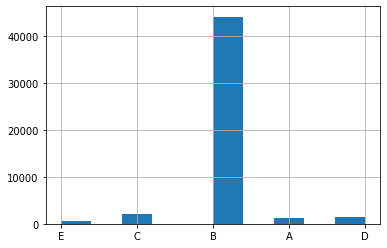

In [ ]:
all_.Nutri_Grade_Level.hist()

In [ ]:
all_.to_csv('drive/Shared drives/Fall2020DSGirlPower/SI671/project/data/Nutriton_Facts.csv')